In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
train_df = pd.read_csv('./train/train.csv')
test_df = pd.read_csv('./test/test.csv')
original_train_df = train_df.copy()
original_test_df = test_df.copy()

In [3]:
train_df.shape, test_df.shape

((341424, 24), (146765, 23))

In [4]:
train_df.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,...,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,05/04/18,05/04/18,06/04/18,3,1,2,0,46,3,...,7.0,3,3,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,7.706428
1,03930f033646d073462b35d411616323597715ac4fc398...,23/01/15,11/04/15,16/04/15,1,1,2,0,46,3,...,7.0,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,6.662563
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,28/01/15,01/02/15,05/02/15,1,1,2,0,47,1,...,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,7.871602
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,02/05/15,11/06/15,16/06/15,1,1,2,2,46,2,...,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,5.344943
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,02/09/15,14/12/15,19/12/15,1,1,2,0,46,2,...,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,7.059346


#### Checking datatypes

In [5]:
train_df.dtypes

reservation_id                         object
booking_date                           object
checkin_date                           object
checkout_date                          object
channel_code                            int64
main_product_code                       int64
numberofadults                          int64
numberofchildren                        int64
persontravellingid                      int64
resort_region_code                      int64
resort_type_code                        int64
room_type_booked_code                   int64
roomnights                              int64
season_holidayed_code                 float64
state_code_residence                  float64
state_code_resort                       int64
total_pax                               int64
member_age_buckets                     object
booking_type_code                       int64
memberid                               object
cluster_code                           object
reservationstatusid_code          

### For checking missing values

In [6]:
train_df.isnull().sum(), test_df.isnull().sum()

(reservation_id                           0
 booking_date                             0
 checkin_date                             0
 checkout_date                            0
 channel_code                             0
 main_product_code                        0
 numberofadults                           0
 numberofchildren                         0
 persontravellingid                       0
 resort_region_code                       0
 resort_type_code                         0
 room_type_booked_code                    0
 roomnights                               0
 season_holidayed_code                  114
 state_code_residence                  4764
 state_code_resort                        0
 total_pax                                0
 member_age_buckets                       0
 booking_type_code                        0
 memberid                                 0
 cluster_code                             0
 reservationstatusid_code                 0
 resort_id                      

In [7]:
train_df['season_holidayed_code'].value_counts(), train_df['state_code_residence'].value_counts()

(2.0    126771
 3.0    118187
 4.0     69387
 1.0     26965
 Name: season_holidayed_code, dtype: int64, 8.0     134919
 2.0      41143
 1.0      28040
 7.0      25873
 5.0      21051
 4.0      15938
 9.0      12291
 15.0      9490
 10.0      9356
 6.0       6384
 12.0      6092
 3.0       3943
 23.0      3835
 14.0      3132
 16.0      2371
 13.0      1771
 21.0      1694
 20.0      1470
 18.0      1429
 19.0      1085
 26.0      1068
 25.0       840
 27.0       790
 11.0       713
 28.0       541
 22.0       432
 24.0       382
 30.0       144
 29.0       101
 33.0        88
 31.0        60
 37.0        59
 32.0        53
 34.0        48
 35.0        16
 36.0        12
 38.0         6
 Name: state_code_residence, dtype: int64)

### Filling missing values as 0.0

In [8]:
train_df['season_holidayed_code'].fillna(0.0, inplace=True)
train_df['state_code_residence'].fillna(0.0, inplace=True)

test_df['season_holidayed_code'].fillna(0.0, inplace=True)
test_df['state_code_residence'].fillna(0.0, inplace=True)

In [9]:
train_df['season_holidayed_code'].value_counts(), train_df['state_code_residence'].value_counts()

(2.0    126771
 3.0    118187
 4.0     69387
 1.0     26965
 0.0       114
 Name: season_holidayed_code, dtype: int64, 8.0     134919
 2.0      41143
 1.0      28040
 7.0      25873
 5.0      21051
 4.0      15938
 9.0      12291
 15.0      9490
 10.0      9356
 6.0       6384
 12.0      6092
 0.0       4764
 3.0       3943
 23.0      3835
 14.0      3132
 16.0      2371
 13.0      1771
 21.0      1694
 20.0      1470
 18.0      1429
 19.0      1085
 26.0      1068
 25.0       840
 27.0       790
 11.0       713
 28.0       541
 22.0       432
 24.0       382
 30.0       144
 29.0       101
 33.0        88
 31.0        60
 37.0        59
 32.0        53
 34.0        48
 35.0        16
 36.0        12
 38.0         6
 Name: state_code_residence, dtype: int64)

#### Using Pearson Correlation

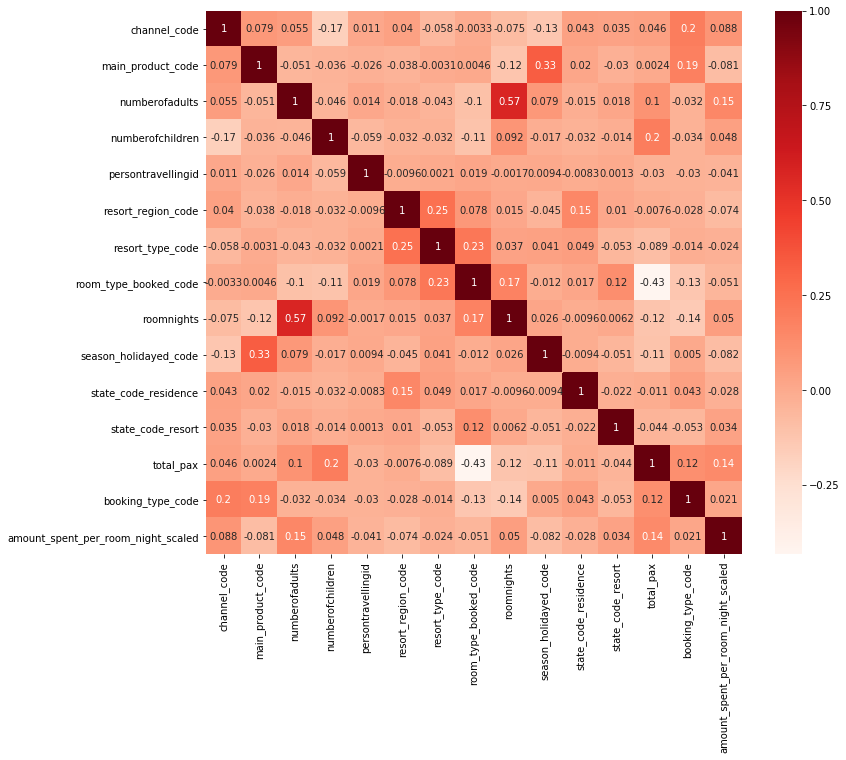

In [10]:
plt.figure(figsize=(12,10))
cor = train_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [11]:
train_df['cluster_code'].unique(), train_df['reservationstatusid_code'].unique(), train_df['resort_id'].unique(), train_df['member_age_buckets'].unique()

(array(['F', 'E', 'D', 'B', 'A', 'C'], dtype=object),
 array(['C', 'A', 'B', 'D'], dtype=object),
 array(['4e07408562bedb8b60ce05c1decfe3ad16b72230967de01f640b7e4729b49fce',
        '39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac8f9e9a2596173f80c9',
        '535fa30d7e25dd8a49f1536779734ec8286108d115da5045d77f3b4185d8f790',
        'd4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f90da3a666eec13ab35',
        'b17ef6d19c7a5b1ee83b907c595526dcb1eb06db8227d650d5dda0a9f4ce8cd9',
        'ff5a1ae012afa5d4c889c50ad427aaf545d31a4fac04ffc1c4d03d403ba4250a',
        '0b918943df0962bc7a1824c0555a389347b4febdc7cf9d1254406d80ce44e3f9',
        'a68b412c4282555f15546cf6e1fc42893b7e07f271557ceb021821098dd66c1b',
        '7f2253d7e228b22a08bda1f09c516f6fead81df6536eb02fa991a34bb38d9be8',
        '4ec9599fc203d176a301536c2e091a19bc852759b255bd6818810a42c5fed14a',
        '49d180ecf56132819571bf39d9b7b342522a2ac6d23c1418d3338251bfe469c8',
        'e7f6c011776e8db7cd330b54174fd76f7d0216b612387a5ffcfb81e6f

In [12]:
test_df['cluster_code'].unique(), test_df['reservationstatusid_code'].unique(), test_df['resort_id'].unique(), test_df['member_age_buckets'].unique()

(array(['A', 'F', 'D', 'E', 'C', 'B'], dtype=object),
 array(['C', 'A', 'B'], dtype=object),
 array(['9f14025af0065b30e47e23ebb3b491d39ae8ed17d33739e5ff3827ffb3634953',
        'e7f6c011776e8db7cd330b54174fd76f7d0216b612387a5ffcfb81e6f0919683',
        'd4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f90da3a666eec13ab35',
        '49d180ecf56132819571bf39d9b7b342522a2ac6d23c1418d3338251bfe469c8',
        'e29c9c180c6279b0b02abd6a1801c7c04082cf486ec027aa13515e4f3884bb6b',
        'b17ef6d19c7a5b1ee83b907c595526dcb1eb06db8227d650d5dda0a9f4ce8cd9',
        'c75cb66ae28d8ebc6eded002c28a8ba0d06d3a78c6b5cbf9b2ade051f0775ac4',
        '535fa30d7e25dd8a49f1536779734ec8286108d115da5045d77f3b4185d8f790',
        '3fdba35f04dc8c462986c992bcf875546257113072a909c162f7e470e581e278',
        '7f2253d7e228b22a08bda1f09c516f6fead81df6536eb02fa991a34bb38d9be8',
        '9400f1b21cb527d7fa3d3eabba93557a18ebe7a2ca4e471cfe5e4c5b4ca7f767',
        'ff5a1ae012afa5d4c889c50ad427aaf545d31a4fac04ffc1c4d03d403ba425

###### cluster_code & reservationstatusid_code is converted into integer from object data type

In [13]:
# A as 1, B as 2, C as 3, D as 4, E as 5 & F as 6 FOR CLUSTER_CODE
train_df['cluster_code'] = train_df['cluster_code'].replace(('A','B','C','D','E','F'),(1,2,3,4,5,6))
test_df['cluster_code'] = test_df['cluster_code'].replace(('A','B','C','D','E','F'),(1,2,3,4,5,6))

# A as 1, B as 2, C as 3 & D as 4 FOR RESERVATION STATUS ID CODE
train_df['reservationstatusid_code'] = train_df['reservationstatusid_code'].replace(('A','B','C','D'),(1,2,3,4))
test_df['reservationstatusid_code'] = test_df['reservationstatusid_code'].replace(('A','B','C'),(1,2,3))

# A as 1, B as 2, C as 3, D as 4, E as 5, F as 6, G as 7, H as 8, I as 9 & J as 10 FOR MEMBER_AGE_BUCKET
train_df['member_age_buckets'] = train_df['member_age_buckets'].replace(('A','B','C','D','E','F','G','H','I','J'),(1,2,3,4,5,6,7,8,9,10))
test_df['member_age_buckets'] = test_df['member_age_buckets'].replace(('A','B','C','D','E','F','G','H','I','J'),(1,2,3,4,5,6,7,8,9,10))

In [14]:
train_df['booking_date'] = pd.to_datetime(train_df['booking_date'], format='%d/%m/%y')
train_df['checkin_date'] = pd.to_datetime(train_df['checkin_date'], format='%d/%m/%y')
train_df['checkout_date'] = pd.to_datetime(train_df['checkout_date'], format='%d/%m/%y')

test_df['booking_date'] = pd.to_datetime(test_df['booking_date'], format='%d/%m/%y')
test_df['checkin_date'] = pd.to_datetime(test_df['checkin_date'], format='%d/%m/%y')
test_df['checkout_date'] = pd.to_datetime(test_df['checkout_date'], format='%d/%m/%y')

In [15]:
train_df.dtypes, test_df.dtypes

(reservation_id                                object
 booking_date                          datetime64[ns]
 checkin_date                          datetime64[ns]
 checkout_date                         datetime64[ns]
 channel_code                                   int64
 main_product_code                              int64
 numberofadults                                 int64
 numberofchildren                               int64
 persontravellingid                             int64
 resort_region_code                             int64
 resort_type_code                               int64
 room_type_booked_code                          int64
 roomnights                                     int64
 season_holidayed_code                        float64
 state_code_residence                         float64
 state_code_resort                              int64
 total_pax                                      int64
 member_age_buckets                             int64
 booking_type_code          

In [16]:
for i in (train_df, test_df):
    i['b_year'] = i['booking_date'].dt.year
    i['b_month'] = i['booking_date'].dt.month
    i['c_in_year'] = i['checkin_date'].dt.year
    i['c_in_month'] = i['checkin_date'].dt.month
    i['c_out_year'] = i['checkout_date'].dt.year
    i['c_out_month'] = i['checkout_date'].dt.month

In [17]:
train_df.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,...,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,b_year,b_month,c_in_year,c_in_month,c_out_year,c_out_month
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,2018-04-05,2018-04-05,2018-04-06,3,1,2,0,46,3,...,6,3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,7.706428,2018,4,2018,4,2018,4
1,03930f033646d073462b35d411616323597715ac4fc398...,2015-01-23,2015-04-11,2015-04-16,1,1,2,0,46,3,...,6,1,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,6.662563,2015,1,2015,4,2015,4
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,2015-01-28,2015-02-01,2015-02-05,1,1,2,0,47,1,...,5,1,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,7.871602,2015,1,2015,2,2015,2
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,2015-05-02,2015-06-11,2015-06-16,1,1,2,2,46,2,...,4,1,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,5.344943,2015,5,2015,6,2015,6
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,2015-09-02,2015-12-14,2015-12-19,1,1,2,0,46,2,...,4,1,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,7.059346,2015,9,2015,12,2015,12


In [18]:
features = ['channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
       'total_pax', 'member_age_buckets', 'booking_type_code',
       'cluster_code', 'reservationstatusid_code', 'b_year', 'b_month', 'c_in_year',
       'c_in_month', 'c_out_year', 'c_out_month']
target = ['amount_spent_per_room_night_scaled']

In [19]:
X = train_df[features] 
y = train_df[target]

In [20]:
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3)

## Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
y_prediction = regressor.predict(x_cv)
y_prediction

array([[7.61964193],
       [7.78813722],
       [7.67122866],
       ...,
       [8.10443541],
       [7.76333469],
       [7.98380084]])

### root mean squared error

In [23]:
rms = sqrt(mean_squared_error(y_true=y_cv, y_pred=y_prediction))
print(rms)

1.0491315161494947


### Prediction on Test file

In [ ]:
X_test = test_df[features]
print(len(X.columns))
print(len(X_test.columns))

23
23


In [ ]:
pred_test = regressor.predict(X_test)
submission=pd.read_csv("./sample_submission/sample_submission.csv")

submission['amount_spent_per_room_night_scaled']=pred_test 
submission['reservation_id']=original_test_df['reservation_id']

submission.to_csv('linearRegression.csv', columns=['reservation_id', 'amount_spent_per_room_night_scaled'], index=False)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=20, n_estimators=300, random_state=False, verbose=False)

In [ ]:
rfr.fit(x_train, y_train)
y_prediction = rfr.predict(x_cv)
y_prediction

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


array([7.66487535, 8.92130109, 7.61170279, ..., 7.96062364, 8.20285864,
       7.89728685])

In [ ]:
rms = sqrt(mean_squared_error(y_true=y_cv, y_pred=y_prediction))
print(rms)

1.0344734450765152


### prediction on test file

In [ ]:
X_test = test_df[features]
pred_test = rfr.predict(X_test)
submission = pd.read_csv('sample_submission/sample_submission.csv')
submission['amount_spent_per_room_night_scaled'] = pred_test
submission['reservation_id'] = original_test_df['reservation_id']

submission.to_csv('randomForestRegression.csv', columns = ['reservation_id', 'amount_spent_per_room_night_scaled'], index=False)

## Extra tree regressor

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor(max_depth=20, n_estimators=200)
etr.fit(x_train, y_train)
y_prediction = etr.predict(x_cv)
rms = sqrt(mean_squared_error(y_true=y_cv, y_pred=y_prediction))
print(rms)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


1.038535250055176


### XGB Regressor

In [ ]:
from xgboost import XGBRegressor
xgbr = XGBRegressor(max_depth=10, n_estimators=200, objective='reg:linear',learning_rate=0.1,
                   colsample_bytree=0.3, alpha=10)
xgbr.fit(x_train,y_train)
y_prediction = xgbr.predict(x_cv)
rms = sqrt(mean_squared_error(y_true=y_cv, y_pred=y_prediction))
print(rms)

1.0185112898372068


In [ ]:
X_test = test_df[features]
pred_test = xgbr.predict(X_test)
submission = pd.read_csv('sample_submission/sample_submission.csv')
submission['amount_spent_per_room_night_scaled'] = pred_test
submission['reservation_id'] = original_test_df['reservation_id']

submission.to_csv('xgbRegressor.csv', columns = ['reservation_id', 'amount_spent_per_room_night_scaled'], index=False)

## SVR

## grid search cv on random forest

In [ ]:
from sklearn.model_selection import GridSearchCV
paramgrid = {'max_depth': list(range(1, 40, 2)), 'n_estimators': list(range(1, 500, 50))}
grid_search=GridSearchCV(RandomForestRegressor(random_state=1),paramgrid)
grid_search.fit(x_train,y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was pa

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was pa

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was pa

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was pa

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was pa

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was pa

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was pa

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was pa

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was pa

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was pa

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was pa

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was pa

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was pa

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was pa

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was pa

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was pa

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was pa

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was pa

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was pa

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was pa

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was pa

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was pa

In [ ]:
grid_search.best_estimator_